<a href="https://colab.research.google.com/github/Vigna200/FMML_Project_Labs/blob/main/AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

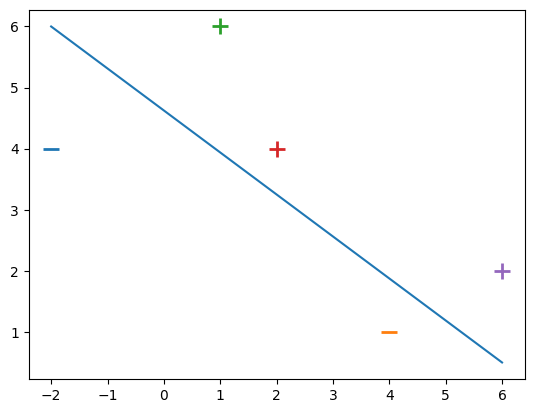

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

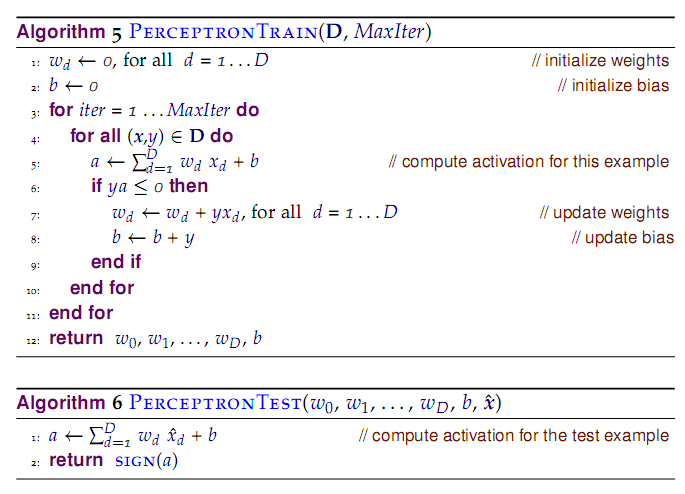

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [64]:
def perceptron_algo_plot(X, Y,n=30):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    errors = []
    for t in range(n):
      total_error = 0
      for i, x in enumerate(X):
          if (np.dot(X[i], w) * Y[i]) <= 0:
              total_error += (np.dot(X[i], w) * Y[i])
              w = w + eta * X[i] * Y[i]
      errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

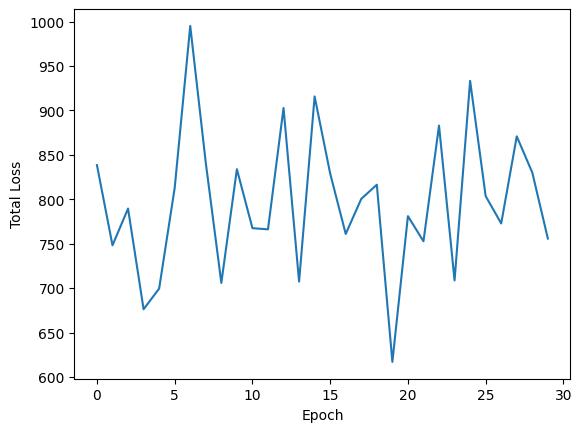

In [49]:
w = perceptron_algo_plot(X, y,n=30)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

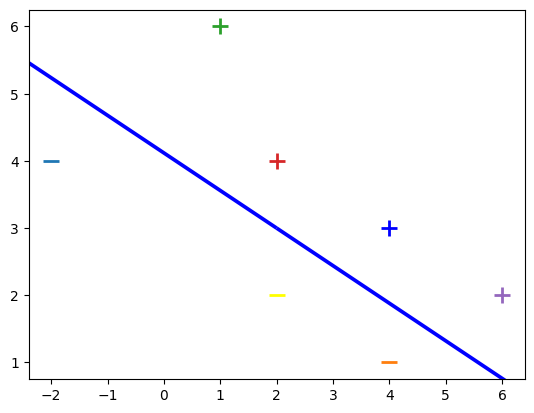

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



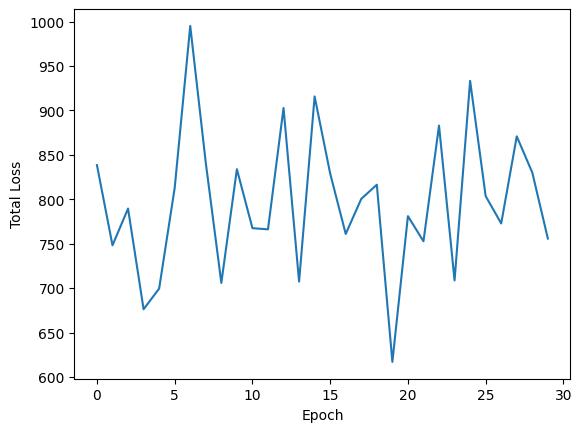

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, header=None)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
X = df[['variance', 'skewness', 'curtosis', 'entropy']].values
y = df['class'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.c_[X_scaled, -np.ones(X_scaled.shape[0])]
w = perceptron_algo_plot(X, y,n=30)

Testing with Learning Rate: 0.001
Weights for Learning Rate 0.001: [0. 0.]
Testing with Learning Rate: 0.01
Weights for Learning Rate 0.01: [0. 0.]
Testing with Learning Rate: 0.1
Weights for Learning Rate 0.1: [0. 0.]
Testing with Learning Rate: 1
Weights for Learning Rate 1: [0. 0.]
Testing with Learning Rate: 10
Weights for Learning Rate 10: [0. 0.]


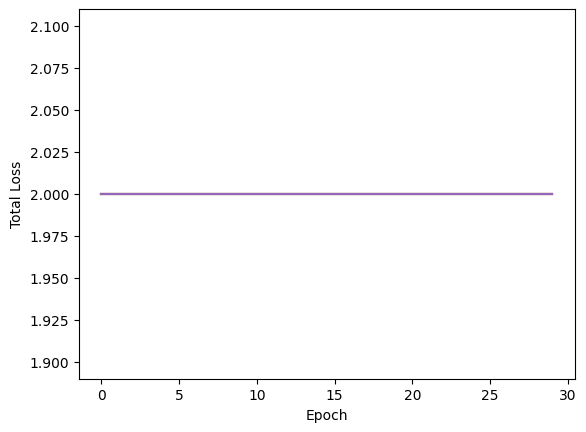

In [66]:
#2
X = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])
Y = np.array([1, 1, -1, -1])
learning_rates = [0.001, 0.01, 0.1, 1, 10]
epochs = 30
for lr in learning_rates:
    print(f"Testing with Learning Rate: {lr}")
    perceptron_algo_plot.__globals__['eta'] = lr
    w = perceptron_algo_plot(X, Y, n=epochs)
    print(f"Weights for Learning Rate {lr}: {w}")


In [67]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [68]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


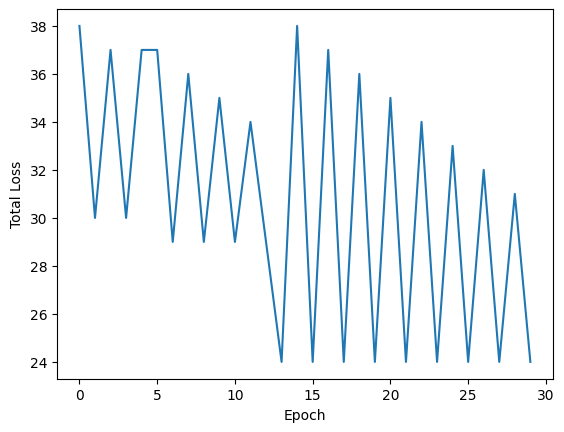

In [69]:
print(perceptron_algo_plot(X, y,n=30))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

Final Weight Vector: [ -1.   5. -10.]


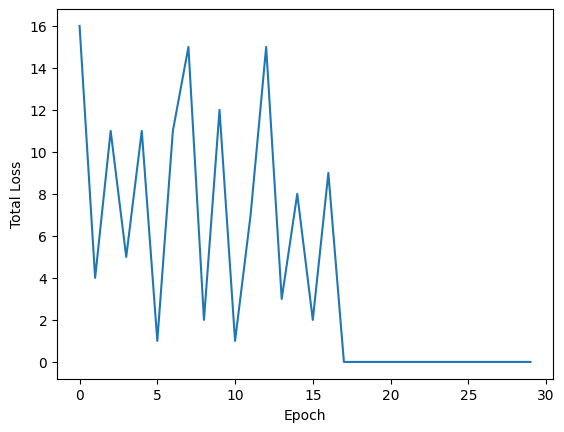

In [71]:
#3
X = np.array([
    [2, -1, 1],
    [4, 3, 1],
    [-2, 5, 1],
    [1, 2, 1]
])
y = np.array([-1, 1, 1, -1])
w = perceptron_algo_plot(X, y, n=30)
print(f"Final Weight Vector: {w}")

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

1.

x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}
Dataset:

x1    x2     y
0     0      -
0     1      -
1     0      -
1     1      +

The "AND" boolean function is linearly separable. This means that a single hyperplane can be drawn to separate the positive and negative examples in the dataset. Hence, the dataset is learnable by a Perceptron.

Weights Update Procedure

Initial w0 = 0, b0 = 0 at a learning rate of 1:

Iterations:

Initialization: w = [0, 0], b = 0

Iteration 1:

Initially: x = [0, 0], y = -1
Prediction: sign(w⋅x + b) = sign(0) = 0 (incorrect)
Update: w = w + y*x = [0, 0] + (-1)*[0, 0] = [0, 0]
    b' = b + y = 0 + (-1) = -1'

Iteration 2:

Input: x = [0, 1], y = -1
Prediction: sign(w⋅x + b) = sign(-1) = -1 (Correct)
No update.
Iteration 3:

Input: x = [1, 0], y = -1
Prediction: sign(w⋅x + b) = sign(-1) = -1 (Correct)
No update.
Iteration 4:

Input: x = [1, 1], y = 1
Prediction: sign(w⋅x + b) = sign(-1) = -1 (Incorrect)
Update: w = w + y*x = [0, 0] + (1)*[1, 1] = [1, 1]
    b' = b + y = -1 + (1) = 0'
Iteration 5:

Input: x = [0, 0], y = -1
Prediction: sign(w⋅x + b) = sign(0) = 0 (Incorrect)
Update: w = w + y*x = [1, 1] + (-1)*[0, 0] = [1, 1]
    b' = b + y = 0 + (-1) = -1'
Iteration 6:

Input: x = [0, 1], y = -1
Prediction: sign(w⋅x + b) = sign(0) = 0 (Incorrect)
Update: w = w + y*x = [1, 1] + (-1)*[0, 1] = [1, 0]
    b' = b + y = -1 + (-1) = -2'
Iteration 7:

Input: x = [1, 0], y = -1
Prediction: sign(w⋅x + b) = sign(-1) = -1 (Correct)
No update.
Iteration 8:

Input: x = [1, 1], y = 1
Prediction: sign(w⋅x + b) = sign(-1) = -1 (Incorrect)
Update: w = w + y*x = [1, 0] + (1)*[1, 1] = [2, 1]
    b' = b + y = -2 + (1) = -1'
C Perceptron algorithm is guaranteed to converge in a finite number of steps for linearly separable datasets.
The final weights will represent a hyperplane that correctly separates the data points according to the "AND" boolean function.

2.


To determine the number of learnable boolean functions by a Perceptron over a 2-bit binary input 𝑥=(𝑥1,𝑥2), let’s break it down step by step:

Step 1:

A perceptron separates data points into two classes using a linear decision boundary, defined as:
w1x1+w2x2+b=0
This means:

Boolean functions learnable by a perceptron must be linearly separable, where a single line (or hyperplane) can separate positive outputs from negative outputs.

Step 2:

The 2-bit binary inputs are:

Inputs
𝑥=(𝑥1,𝑥2)

x1    x2
0      0
0      1
1      0
1      1

Each function maps these inputs to an output y∈{−1,+1}.

Step 3:

For 4 inputs total 16 possible mappings of inputs to 𝑦 values, which correspond to 16 distinct boolean functions.

Step 4:

We analyze all 16 functions to see which are linearly separable.

Step 4a:

Functions that are linearly separable:
Constant functions: Always output the same class y=-1
           y=+1
Functions that separate based on one input at a time: y=x1
                 y=-x1
                 y=x2
                 y=-x2
Logical operations:
𝑦=AND(𝑥1,𝑥2)
y=OR(x1,x2)
y=NAND(x1,x2)
y=NOR(x1,x2)
There are 14 functions that are linearly separable.

Step 4b:

Non-linearly separable functions:
Functions such as XOR and XNOR are not linearly separable because there is no hyperplane that can separate their +1 and −1 outputs.
Truth Tables of Non-Linearly Separable Functions
XOR:
x1    x2    y
0     0     -1
0     1     +1
1     0     +1
1     1     -1

NXOR:
x1    x2    y
0     0     +1
0     1     -1
1     0     -1
1     1     +1

Hence only 14 are learnable by a perceptron. Rest 2 are not learnable (XOR and XNOR), as they are not linearly separable.





